In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arctan

In [2]:
F = 1
b = 1
w0 = 3
w = 3
c = 10

# The acceleration. This is where the intrinsic dynamics/diff equation of the system is declared.

def a(x,v,t, switch):
    if switch == 1:
        return F*np.cos(w*t) - b*v - w0**2 * x - c*x**3  # Driving force present
    if switch == 0:
        return - b*v - w0**2 * x - c*x**3                # No driving force

In [3]:
#Damped Duffin Oscillator (no forcing)

#===================================
#Setting up parameters and arrays


switch = 0                         # Manipulate forcing. 0 = off; 1 = on
ti = 0                             # Initial time
tf= 20                             # Final time
dt = 0.01                          # Time step 

N = int((tf-ti)/dt)                # number of steps 

x = np.zeros(N+1,float)     
v = np.zeros(N+1,float)     
t = np.zeros(N+1,float)  

#===================================

# Initial conditions

x0 = 1
v0 = 0

x[0] = x0                    
v[0] = v0 + a(x0,v0, 0, switch)*dt/2    # leapfrog method
#===================================


for i in range(1,N+1):       # The loop that determines the kinematics by incrementing
    t[i] = i*dt              # each of the above arrays by their corresponding increases.
    x[i] = x[i-1] + v[i-1]*dt
    v[i] = v[i-1] + a(x[i],v[i-1], t[i], switch)*dt
#==================================

#analytical = np.exp(-b*t/2)*np.cos(w0*t) + F/np.sqrt((w**2-w0**2)**2 +b**2 * w**2) * np.cos(w*t - np.arctan(-w*b/(w**2-w0**2)))
analytical = np.exp(-b*t/2)*np.cos(w0*t)




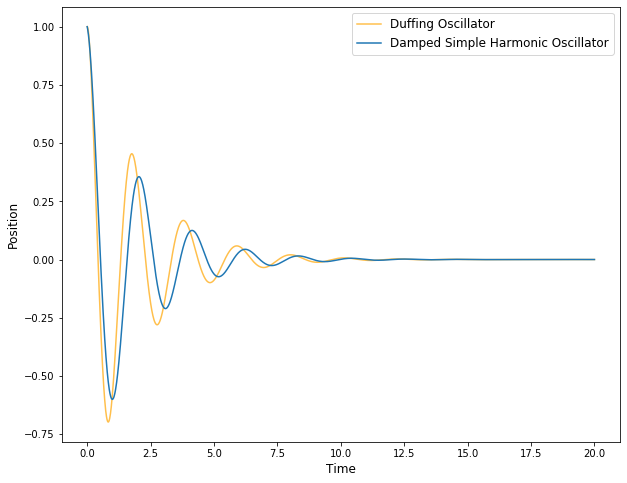

In [55]:
plt.plot(t,x, alpha = 0.7, color = 'orange', label = 'Duffing Oscillator') 

plt.plot(t, analytical, label='Damped Simple Harmonic Oscillator')
plt.rcParams['figure.figsize']=[10,8]
plt.xlabel("Time", fontsize = '12')
plt.ylabel("Position", fontsize = '12')
plt.legend(fontsize = '12')
plt.show()

In [51]:
#Probing the chaotic behaviour of a Duffin Oscillator.


def chaos(F):
    
    b = 0.5
    w0 = 3
    w = 3
    c = 10

    def a(x,v,t, switch):
        if switch == 1:
            return F*np.cos(w*t) - b*v - w0**2 * x - c*x**3
        if switch == 0:
            return - b*v - w0**2 * x - c*x**3

    switch = 1
    ti = 0                             # Initial time
    tf= 50                             # Final time
    dt = 0.001                           # Time step 

    N = int((tf-ti)/dt)                # number of steps 

    x = np.zeros(N+1,float)     
    v = np.zeros(N+1,float)     
    t = np.zeros(N+1,float)  

    #===================================

    # Initial conditions

    x0 = 0
    v0 = 0
    X = []
    V = []
    x[0] = x0                    
    v[0] = v0 + a(x0,v0, 0, switch)*dt/2    # leapfrog method
    #===================================


    for i in range(1,N+1):       # The loop that determines the kinematics by incrementing
        t[i] = i*dt              # each of the above arrays by their corresponding increases.
        x[i] = x[i-1] + v[i-1]*dt
        v[i] = v[i-1] + a(x[i],v[i-1], t[i], switch)*dt
        X.append(x[i])
        V.append(v[i])
        x[0] = X[-1]                   
        v[0] = V[-1]
    #==================================

    #analytical = np.exp(-b*t/2)*np.cos(w0*t) + F/np.sqrt((w**2-w0**2)**2 +b**2 * w**2) * np.cos(w*t - np.arctan(-w*b/(w**2-w0**2)))
    #analytical = np.exp(-b*t/2)*np.cos(w0*t)

    return plt.plot(X[300:],V[300:], label = 'Driver Amplitude ' + f'{F}')

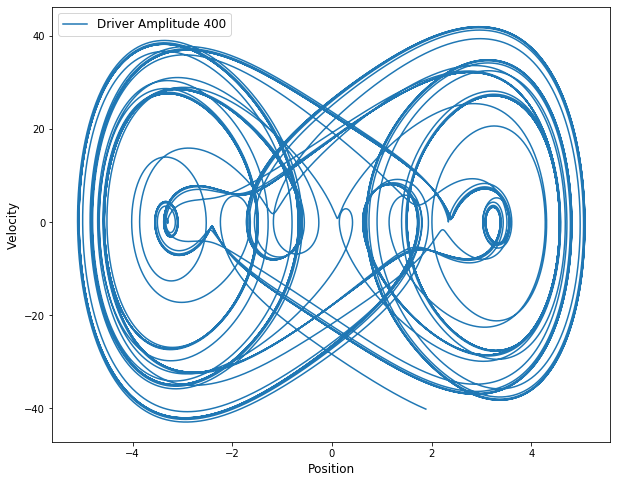

In [53]:
#Phase diagram for several Amplitudes of Forcing

for u in range (1, 2):
    F = u*400
    chaos(F)
#plt.colorbar()
plt.xlabel("Position", fontsize = '12')
plt.ylabel("Velocity", fontsize = '12')
plt.legend(fontsize = '12')
plt.show()

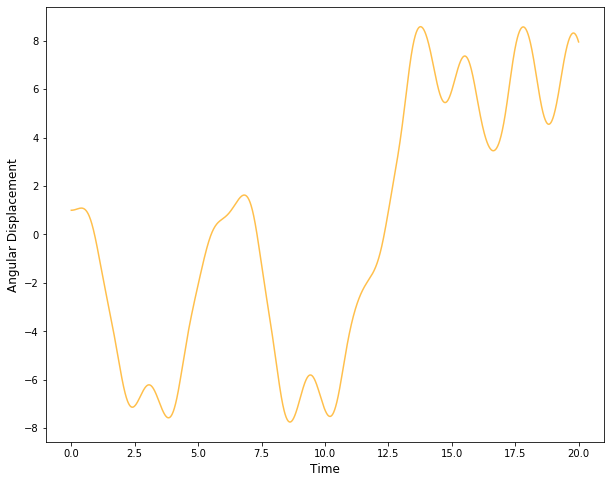

In [79]:
#Chaotic Pendulum

F = 10
b = 0.2
w0 = 3
w = 3
c = 10

def a(x,v,t, switch):
    if switch == 1:
        return F*np.cos(w*t) - b*v - w0**2 * np.sin(x) 
    if switch == 0:
        return - b*v - w0**2 * np.sin(x) 
    

#===================================
#Setting up parameters and arrays


switch = 1                         # Manipulate forcing. 0 = off; 1 = on
ti = 0                             # Initial time
tf= 20                             # Final time
dt = 0.01                          # Time step 

N = int((tf-ti)/dt)                # number of steps 

x = np.zeros(N+1,float)     
v = np.zeros(N+1,float)     
t = np.zeros(N+1,float)  

#===================================

# Initial conditions

x0 = 1
v0 = 0

x[0] = x0                    
v[0] = v0 + a(x0,v0, 0, switch)*dt/2    # leapfrog method
#===================================


for i in range(1,N+1):       # The loop that determines the kinematics by incrementing
    t[i] = i*dt              # each of the above arrays by their corresponding increases.
    x[i] = (x[i-1] + v[i-1]*dt)
    
    v[i] = v[i-1] + a(x[i],v[i-1], t[i], switch)*dt
#==================================

#analytical = np.exp(-b*t/2)*np.cos(w0*t) + F/np.sqrt((w**2-w0**2)**2 +b**2 * w**2) * np.cos(w*t - np.arctan(-w*b/(w**2-w0**2)))
#analytical = np.exp(-b*t/2)*3*np.cos(w0*t)


plt.plot(t,x, alpha = 0.7, color = 'orange') 


#plt.plot(t, analytical)
plt.rcParams['figure.figsize']=[10,8]
plt.xlabel("Time", fontsize = '12')
plt.ylabel("Angular Displacement", fontsize = '12')
plt.show()


In [81]:
# Exploring chaos in chaotic pendulum 
def chaos(F):
    
    b = 0.2
    w0 = 3
    w = 3
    c = 10

    def a(x,v,t, switch):
        if switch == 1:
            return F*np.cos(w*t) - b*v - w0**2 * np.sin(x) 
        if switch == 0:
            return - b*v - w0**2 * np.sin(x) 

    switch = 1
    ti = 0                             # Initial time
    tf= 20                             # Final time
    dt = 0.01                           # Time step 

    N = int((tf-ti)/dt)                # number of steps 

    x = np.zeros(N+1,float)     
    v = np.zeros(N+1,float)     
    t = np.zeros(N+1,float)  

    #===================================

    # Initial conditions

    x0 = 1
    v0 = 0
    X = []
    V = []
    x[0] = x0                    
    v[0] = v0 + a(x0,v0, 0, switch)*dt/2    # leapfrog method
    #===================================


    for i in range(1,N+1):       # The loop that determines the kinematics by incrementing
        t[i] = i*dt              # each of the above arrays by their corresponding increases.
        x[i] = x[i-1] + v[i-1]*dt
        v[i] = v[i-1] + a(x[i],v[i-1], t[i], switch)*dt
        X.append(x[i])
        V.append(v[i])
        x[0] = X[-1]                   
        v[0] = V[-1]
    #==================================

    #analytical = np.exp(-b*t/2)*np.cos(w0*t) + F/np.sqrt((w**2-w0**2)**2 +b**2 * w**2) * np.cos(w*t - np.arctan(-w*b/(w**2-w0**2)))
    #analytical = np.exp(-b*t/2)*np.cos(w0*t)

    return plt.plot(X[100:],V[100:])

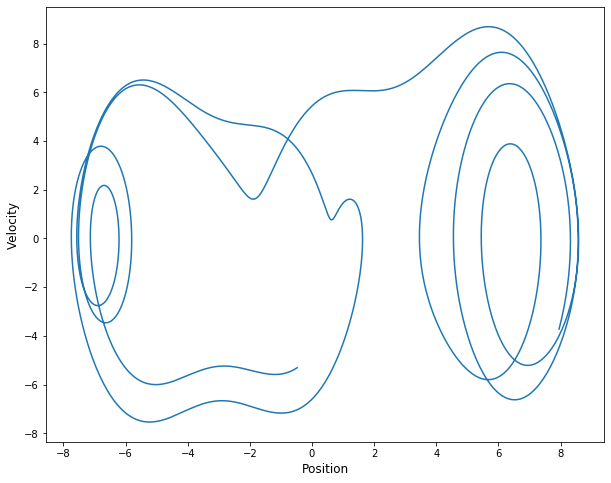

In [80]:
#Phase diagram for several Amplitudes of Forcing

for u in range (1, 2):
    F = u*10
    chaos(F)

plt.xlabel("Position", fontsize = '12')
plt.ylabel("Velocity", fontsize = '12')
plt.show()